In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\Shalv Srivastava\\Desktop\\Proj_SST\elnino.csv')


In [3]:
df.dtypes

Observation            int64
 Year                  int64
 Month                 int64
 Day                   int64
 Date                  int64
 Latitude            float64
 Longitude           float64
 Zonal Winds          object
 Meridional Winds     object
 Humidity             object
 Air Temp             object
 Sea Surface Temp     object
dtype: object

In [4]:
df.dropna(inplace=True)

In [5]:
print(df.isnull().sum())

Observation          0
 Year                0
 Month               0
 Day                 0
 Date                0
 Latitude            0
 Longitude           0
 Zonal Winds         0
 Meridional Winds    0
 Humidity            0
 Air Temp            0
 Sea Surface Temp    0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Observation        178080 non-null  int64  
 1    Year              178080 non-null  int64  
 2    Month             178080 non-null  int64  
 3    Day               178080 non-null  int64  
 4    Date              178080 non-null  int64  
 5    Latitude          178080 non-null  float64
 6    Longitude         178080 non-null  float64
 7    Zonal Winds       178080 non-null  object 
 8    Meridional Winds  178080 non-null  object 
 9    Humidity          178080 non-null  object 
 10   Air Temp          178080 non-null  object 
 11   Sea Surface Temp  178080 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


In [7]:
df.describe()

,Observation,Year,Month,Day,Date,Latitude,Longitude
count,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000
mean,89040.500000,93.302325,6.504869,15.720536,933689.455374,0.473626,-54.025233
std,51407.412306,3.393818,3.459657,8.800487,33900.474320,4.583041,135.363994
min,1.000000,80.000000,1.000000,1.000000,800307.000000,-8.810000,-180.000000
25%,44520.750000,92.000000,4.000000,8.000000,920116.000000,-2.010000,-154.950000
50%,89040.500000,94.000000,6.000000,16.000000,940601.000000,0.010000,-111.260000
75%,133560.250000,96.000000,10.000000,23.000000,960617.000000,4.980000,147.010000
max,178080.000000,98.000000,12.000000,31.000000,980623.000000,9.050000,171.080000


In [8]:
df.columns

Index(['Observation', ' Year', ' Month', ' Day', ' Date', ' Latitude',
       ' Longitude', ' Zonal Winds', ' Meridional Winds', ' Humidity',
       ' Air Temp', ' Sea Surface Temp'],
      dtype='object')

In [9]:
df.head()

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19


In [10]:
df.dtypes

Observation            int64
 Year                  int64
 Month                 int64
 Day                   int64
 Date                  int64
 Latitude            float64
 Longitude           float64
 Zonal Winds          object
 Meridional Winds     object
 Humidity             object
 Air Temp             object
 Sea Surface Temp     object
dtype: object

In [11]:
names = list(df.columns)
for i in range(0,12):
    names[i] = names[i].lstrip()
df.columns = names


In [12]:
df['Zonal Winds'] = pd.to_numeric(df['Zonal Winds'], errors='coerce')
df['Meridional Winds'] = pd.to_numeric(df['Meridional Winds'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')
df['Air Temp'] = pd.to_numeric(df['Air Temp'], errors='coerce')
df['Sea Surface Temp'] = pd.to_numeric(df['Sea Surface Temp'], errors='coerce')


In [13]:
nan_counts = df[['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp', 'Sea Surface Temp']].isnull().sum()
print(nan_counts)


Zonal Winds         25163
Meridional Winds    25162
Humidity            65761
Air Temp            18237
Sea Surface Temp    17007
dtype: int64


In [14]:
df.shape

(178080, 12)

In [15]:
columns_to_check = ['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp', 'Sea Surface Temp']
df.dropna(subset=columns_to_check, inplace=True)


In [16]:
df.shape

(93935, 12)

In [17]:
########################
########################

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [20]:
selected_features = ['Air Temp', 'Longitude', 'Zonal Winds', 'Humidity', 'Meridional Winds']

selected_features.append('Sea Surface Temp')


selected_data = df[selected_features]

In [21]:
from sklearn.model_selection import train_test_split
X = selected_data.drop(columns=['Sea Surface Temp'])
y = selected_data['Sea Surface Temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Sample data (replace this with your actual data)
data = {
    'Zonal Winds': np.random.uniform(low=-10, high=10, size=100),
    'Meridional Winds': np.random.uniform(low=-10, high=10, size=100),
    'Sea Surface Temp': np.random.uniform(low=20, high=30, size=100),
    'Air Temp': np.random.uniform(low=10, high=25, size=100),
    'Humidity': np.random.uniform(low=0, high=100, size=100)
}
df = pd.DataFrame(data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the scatter plot
scatter = ax.scatter(df['Zonal Winds'], df['Meridional Winds'], df['Sea Surface Temp'],
                     c=df['Air Temp'], s=df['Humidity'], cmap='coolwarm', alpha=0.6)

# Setting labels
ax.set_xlabel('Zonal Winds')
ax.set_ylabel('Meridional Winds')
ax.set_zlabel('Sea Surface Temp')
ax.set_title('Complex 3D Scatter Plot')

# Adding colorbar for Air Temp
cbar = plt.colorbar(scatter)
cbar.set_label('Air Temp')

# Adding legend for Humidity (using marker size)
sizes = [10, 50, 100]  # Assuming these represent different levels of humidity
legend_labels = ['Low Humidity', 'Medium Humidity', 'High Humidity']
legend_markers = [plt.scatter([], [], s=size, label=label, alpha=0.6) for size, label in zip(sizes, legend_labels)]
plt.legend(handles=legend_markers, title='Humidity')

plt.show()


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'Zonal Winds': np.random.uniform(low=-10, high=10, size=100),
    'Meridional Winds': np.random.uniform(low=-10, high=10, size=100),
    'Sea Surface Tou
    emp': np.random.uniform(low=20, high=30, size=100),
    'Air Temp': np.random.uniform(low=10, high=25, size=100),
    'Humidity': np.random.uniform(low=0, high=100, size=100)
}
df = pd.DataFrame(data)

# Creating a pairplot
sns.set(style="ticks")
pair_plot = sns.pairplot(df, diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.5})

# Adjust layout
plt.subplots_adjust(top=0.95)
pair_plot.fig.suptitle('Complex Pairplot of Variables')

plt.show()


In [22]:
df.dtypes

Observation           int64
Year                  int64
Month                 int64
Day                   int64
Date                  int64
Latitude            float64
Longitude           float64
Zonal Winds         float64
Meridional Winds    float64
Humidity            float64
Air Temp            float64
Sea Surface Temp    float64
dtype: object

In [23]:
unique_pairs = df[['Latitude', 'Longitude']].drop_duplicates()

In [24]:
for index, row in unique_pairs.iterrows():
    print(f"lat = {row['Latitude']}, long = {row['Longitude']}")

lat = -0.02, long = -109.96
lat = -0.02, long = -109.97
lat = -0.03, long = -109.96
lat = -0.01, long = -109.97
lat = -0.03, long = -109.97
lat = -0.02, long = -109.98
lat = -0.01, long = -109.98
lat = -0.02, long = -109.99
lat = -0.03, long = -109.99
lat = -0.01, long = -109.99
lat = 0.0, long = -109.98
lat = 0.0, long = -109.99
lat = -0.02, long = -110.0
lat = -0.01, long = -110.0
lat = 0.0, long = -110.0
lat = -0.03, long = -109.95
lat = -0.02, long = -110.02
lat = -0.03, long = -110.02
lat = -0.04, long = -110.03
lat = -0.03, long = -110.04
lat = -0.04, long = -110.04
lat = -0.02, long = -110.03
lat = -0.02, long = -110.04
lat = -0.03, long = -110.03
lat = -0.01, long = -110.03
lat = 0.02, long = -110.02
lat = 0.02, long = -110.03
lat = 0.01, long = -110.03
lat = 0.01, long = -110.02
lat = 0.03, long = -110.02
lat = 0.03, long = -110.03
lat = 0.01, long = -110.04
lat = 0.02, long = -110.01
lat = 0.0, long = -110.03
lat = 0.01, long = -110.0
lat = 0.02, long = -110.0
lat = 0.02, lon

lat = 0.0, long = -95.1
lat = 0.01, long = -95.17
lat = 0.01, long = -95.16
lat = 0.02, long = -95.16
lat = 0.01, long = -95.15
lat = -0.05, long = -95.16
lat = -0.14, long = -95.17
lat = -0.15, long = -95.21
lat = -0.14, long = -95.2
lat = -0.14, long = -95.19
lat = -0.07, long = -95.23
lat = 0.04, long = -95.26
lat = 0.04, long = -95.25
lat = 0.04, long = -95.24
lat = 0.08, long = -95.19
lat = 0.09, long = -95.16
lat = 0.08, long = -95.15
lat = 0.07, long = -95.16
lat = 0.07, long = -95.17
lat = 0.06, long = -95.21
lat = 0.07, long = -95.21
lat = 0.07, long = -95.2
lat = 0.18, long = -95.2
lat = 0.26, long = -95.17
lat = 0.27, long = -95.18
lat = 0.27, long = -95.17
lat = 0.3, long = -95.15
lat = 0.29, long = -95.15
lat = 0.29, long = -95.16
lat = 0.35, long = -95.17
lat = 0.34, long = -95.17
lat = 0.33, long = -95.17
lat = 0.33, long = -95.18
lat = 0.34, long = -95.18
lat = 0.35, long = -95.18
lat = -0.03, long = -95.0
lat = -0.04, long = -95.01
lat = -0.03, long = -95.01
lat = -0.0

lat = 2.02, long = 156.03
lat = 2.03, long = 156.03
lat = 2.03, long = 156.0
lat = 2.04, long = 156.02
lat = 2.0, long = 156.19
lat = 1.95, long = 156.54
lat = 2.02, long = 157.0
lat = 1.97, long = 157.43
lat = 1.83, long = 157.96
lat = 1.81, long = 158.12
lat = 1.81, long = 158.18
lat = 1.8, long = 158.22
lat = 1.79, long = 158.26
lat = 1.79, long = 158.34
lat = 1.79, long = 158.42
lat = 1.78, long = 158.45
lat = 1.78, long = 158.65
lat = 1.76, long = 158.76
lat = 1.74, long = 158.9
lat = 1.73, long = 159.04
lat = 1.73, long = 158.96
lat = 1.75, long = 159.07
lat = 1.75, long = 159.19
lat = 1.78, long = 159.4
lat = 1.75, long = 159.64
lat = 1.76, long = 159.87
lat = 1.75, long = 159.99
lat = 1.74, long = 160.14
lat = 1.71, long = 160.26
lat = 1.73, long = 160.3
lat = 1.76, long = 160.37
lat = 1.78, long = 160.43
lat = 1.81, long = 160.54
lat = 1.82, long = 160.6
lat = 1.88, long = 160.76
lat = 1.9, long = 160.87
lat = 2.03, long = 156.06
lat = 2.08, long = 156.21
lat = 2.08, long = 15

lat = 4.98, long = -109.93
lat = 4.99, long = -109.95
lat = 4.99, long = -109.93
lat = 4.97, long = -109.93
lat = 4.97, long = -109.94
lat = 4.96, long = -109.95
lat = 4.97, long = -109.95
lat = 4.99, long = -109.99
lat = 5.0, long = -109.95
lat = 5.04, long = -109.96
lat = 5.04, long = -109.97
lat = 5.03, long = -109.95
lat = 5.02, long = -109.95
lat = 5.03, long = -110.01
lat = 4.97, long = -109.97
lat = 4.98, long = -109.99
lat = 4.98, long = -109.98
lat = 4.96, long = -109.96
lat = 5.11, long = -124.93
lat = 5.11, long = -124.95
lat = 5.12, long = -124.92
lat = 5.12, long = -124.94
lat = 5.12, long = -124.95
lat = 5.11, long = -124.94
lat = 5.1, long = -124.94
lat = 5.1, long = -124.93
lat = 5.09, long = -124.94
lat = 5.1, long = -124.95
lat = 5.12, long = -124.93
lat = 5.11, long = -124.96
lat = 5.12, long = -124.96
lat = 5.13, long = -124.95
lat = 5.04, long = -124.98
lat = 5.04, long = -124.97
lat = 5.05, long = -124.98
lat = 5.03, long = -124.98
lat = 5.03, long = -124.97
lat =

lat = -4.99, long = -170.0
lat = -5.0, long = -170.02
lat = -5.0, long = -170.03
lat = -4.98, long = -170.02
lat = -5.01, long = -170.03
lat = -4.99, long = -170.03
lat = -5.0, long = -170.04
lat = -4.98, long = -170.03
lat = -4.99, long = -170.04
lat = -5.02, long = -170.02
lat = -4.99, long = -169.99
lat = -4.98, long = -169.99
lat = -4.98, long = -170.0
lat = -4.98, long = -169.98
lat = -4.97, long = -170.0
lat = -5.01, long = -170.0
lat = -5.03, long = -170.0
lat = -4.97, long = -179.89
lat = -4.98, long = -179.89
lat = -4.97, long = -179.9
lat = -4.97, long = -179.88
lat = -5.0, long = -179.93
lat = -5.0, long = -179.92
lat = -4.98, long = -179.9
lat = -4.98, long = -179.88
lat = -4.99, long = -179.89
lat = -4.98, long = -179.87
lat = -4.99, long = -179.88
lat = -4.99, long = -179.9
lat = -4.96, long = -179.89
lat = -4.96, long = -179.88
lat = -4.97, long = -179.98
lat = -4.98, long = -179.91
lat = -4.97, long = -179.91
lat = -4.97, long = -179.93
lat = -5.04, long = -179.76
lat =

lat = 8.99, long = -140.28
lat = 9.01, long = -140.28
lat = 9.0, long = -140.28
lat = 9.0, long = -140.27
lat = 8.99, long = -140.29
lat = 8.97, long = -140.28
lat = 9.01, long = -140.27
lat = 8.98, long = -140.29
lat = 9.02, long = -140.27
lat = 9.02, long = -140.25
lat = 9.01, long = -140.25
lat = 9.01, long = -140.24
lat = 9.02, long = -140.26
lat = 8.96, long = -140.26
lat = 9.0, long = -140.23
lat = 9.03, long = -140.25
lat = 9.01, long = -140.23
lat = 9.02, long = -140.23
lat = 9.01, long = -140.22
lat = 9.03, long = -140.26
lat = 8.99, long = -140.22
lat = 9.03, long = -140.24
lat = 9.02, long = -140.24
lat = 9.02, long = -140.22
lat = 8.99, long = -140.23
lat = 9.0, long = -140.0
lat = 9.0, long = -140.29
lat = 9.05, long = -140.25
lat = 9.02, long = -140.28
lat = 8.98, long = -140.3
lat = 9.01, long = -140.29
lat = 8.96, long = -140.33
lat = 8.95, long = -140.33
lat = 8.96, long = -140.34
lat = 8.95, long = -140.32
lat = 8.96, long = -140.32
lat = 8.97, long = -140.32
lat = 8.

In [25]:
df.columns

Index(['Observation', 'Year', 'Month', 'Day', 'Date', 'Latitude', 'Longitude',
       'Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp',
       'Sea Surface Temp'],
      dtype='object')

In [26]:
df = df[(df != 0).all(axis=1)]

In [27]:
df.head(20
       )

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
4059,4060,93,5,9,930509,-0.02,-109.96,-2.1,2.1,81.2,26.80,27.02
4060,4061,93,5,10,930510,-0.02,-109.96,-3.4,1.4,84.2,26.95,26.91
4061,4062,93,5,11,930511,-0.02,-109.96,-3.8,2.2,84.9,26.98,26.78
4062,4063,93,5,12,930512,-0.02,-109.96,-3.0,1.5,86.9,26.93,26.74
4063,4064,93,5,13,930513,-0.02,-109.96,-4.5,1.9,87.6,27.01,26.82
4064,4065,93,5,14,930514,-0.02,-109.96,-5.0,1.3,85.6,26.96,26.68
4065,4066,93,5,15,930515,-0.02,-109.96,-4.5,0.3,83.4,26.89,26.82
4067,4068,93,5,17,930517,-0.02,-109.97,-0.8,4.3,85.1,27.01,27.33
4068,4069,93,5,18,930518,-0.02,-109.96,-2.0,5.8,85.7,27.19,27.13
4069,4070,93,5,19,930519,-0.02,-109.96,-2.9,4.4,83.0,27.15,26.99


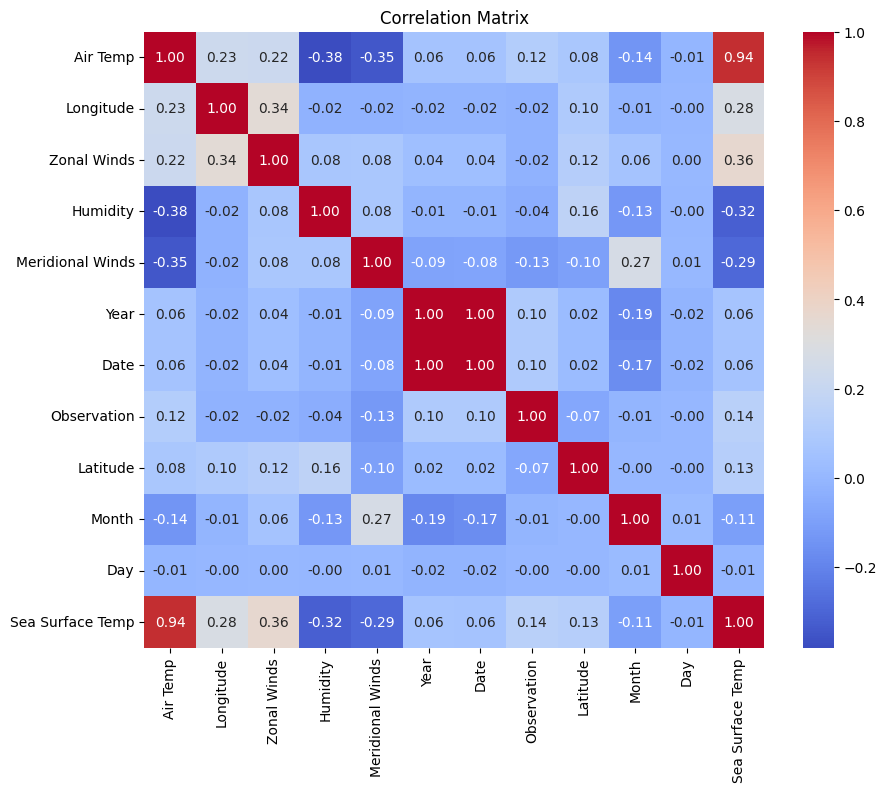

In [28]:
features = ['Air Temp', 'Longitude', 'Zonal Winds', 'Humidity', 'Meridional Winds', 'Year', 'Date', 'Observation', 'Latitude', 'Month', 'Day']
target = 'Sea Surface Temp'


data = df[features + [target]]

correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [29]:
sea_surface_temp_corr = correlation_matrix[target].drop(target)  # Dropping the target column itself

sorted_corr = sea_surface_temp_corr.abs().sort_values(ascending=False)


print("Correlation Scores impacting 'Sea Surface Temperature':")
for feature, corr_score in sorted_corr.items():
    print(f"{feature}: {corr_score:.4f}")

Correlation Scores impacting 'Sea Surface Temperature':
Air Temp: 0.9407
Zonal Winds: 0.3624
Humidity: 0.3167
Meridional Winds: 0.2923
Longitude: 0.2782
Observation: 0.1391
Latitude: 0.1295
Month: 0.1054
Year: 0.0618
Date: 0.0601
Day: 0.0051


In [30]:
df.columns

print(df.dtypes)

Observation           int64
Year                  int64
Month                 int64
Day                   int64
Date                  int64
Latitude            float64
Longitude           float64
Zonal Winds         float64
Meridional Winds    float64
Humidity            float64
Air Temp            float64
Sea Surface Temp    float64
dtype: object


plt.subplot(1, 2, 2)
sns.swarmplot(data=df[['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp', 'Sea Surface Temp']])
plt.title('Swarm Plot - Distribution of Variables')
plt.tight_layout()
plt.show()

min_val = df['Sea Surface Temp'].min()
max_val = df['Sea Surface Temp'].max()


def inverse_transform(values, min_val, max_val):
    return values * (max_val - min_val) + min_val


actual_temp = inverse_transform(y_test_original, min_val, max_val)
predicted_temp = inverse_transform(final_predictions, min_val, max_val)


plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plt.plot(actual_temp, label='Actual Sea Surface Temp', color='blue')
plt.title('Actual Sea Surface Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()

In [31]:
###########################


#MODEL SEPARATION FRANDS

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [33]:
features = ['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp']
target = 'Sea Surface Temp'

In [34]:
data = df[features + [target]]

In [35]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [36]:
sequence_length = 10 
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:(i + sequence_length), :-1])
    y.append(scaled_data[i + sequence_length, -1])

X, y = np.array(X), np.array(y)

In [37]:
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [38]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/50
2216/2216 [==============================] - 68s 22ms/step - loss: 0.0144 - val_loss: 0.0134
Epoch 2/50
2216/2216 [==============================] - 44s 20ms/step - loss: 0.0086 - val_loss: 0.0151
Epoch 3/50
2216/2216 [==============================] - 43s 20ms/step - loss: 0.0057 - val_loss: 0.0126
Epoch 4/50
2216/2216 [==============================] - 48s 22ms/step - loss: 0.0041 - val_loss: 0.0109
Epoch 5/50
2216/2216 [==============================] - 48s 22ms/step - loss: 0.0034 - val_loss: 0.0085
Epoch 6/50
2216/2216 [==============================] - 48s 21ms/step - loss: 0.0030 - val_loss: 0.0070
Epoch 7/50
2216/2216 [==============================] - 50s 22ms/step - loss: 0.0027 - val_loss: 0.0054
Epoch 8/50
2216/2216 [==============================] - 45s 20ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 9/50
2216/2216 [==============================] - 43s 19ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 10/50
2216/2216 [==============================] - 43s 19m

In [40]:
print("Shape of X_test[:, -1, :-1]:", X_test[:, -1, :-1].shape)

predictions = model.predict(X_test)
print("Shape of predictions:", predictions.shape)


Shape of X_test[:, -1, :-1]: (17716, 8)
554/554 [==============================] - 4s 5ms/step
Shape of predictions: (17716, 1)


In [41]:
last_time_step_features = X_test[:, -1, :] 

In [42]:
combined_data = np.concatenate((last_time_step_features, predictions), axis=1)
combined_data
combined_data.shape

(17716, 10)

In [43]:
shape_of_training_data = X_train.shape

print("Shape of data used during training:", shape_of_training_data)

Shape of data used during training: (70900, 10, 9)


In [44]:
original_scale_predictions = scaler.inverse_transform(combined_data)

In [45]:
final_predictions = original_scale_predictions[:, -1]
final_predictions

array([28.01405384, 28.03579563, 28.01936246, ..., 27.94320601,
       27.81373866, 27.99761914])

In [46]:

y_test_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_original, final_predictions)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.2666650416933712


In [48]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.5163962061182975


In [49]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_original, final_predictions)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 0.3937802146260454


In [50]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_original, final_predictions)
print(f"R² Score: {r2}")


R² Score: 0.886591283975323


In [51]:
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test_original, final_predictions)
print(f"Mean Squared Logarithmic Error (MSLE): {msle}")


Mean Squared Logarithmic Error (MSLE): 0.0003248702324196044


In [52]:
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test_original, final_predictions)
print(f"Explained Variance Score: {evs}")


Explained Variance Score: 0.8983381437933835


In [53]:
from sklearn.metrics import max_error
max_err = max_error(y_test_original, final_predictions)
print(f"Max Error: {max_err}")


Max Error: 6.678473160266876


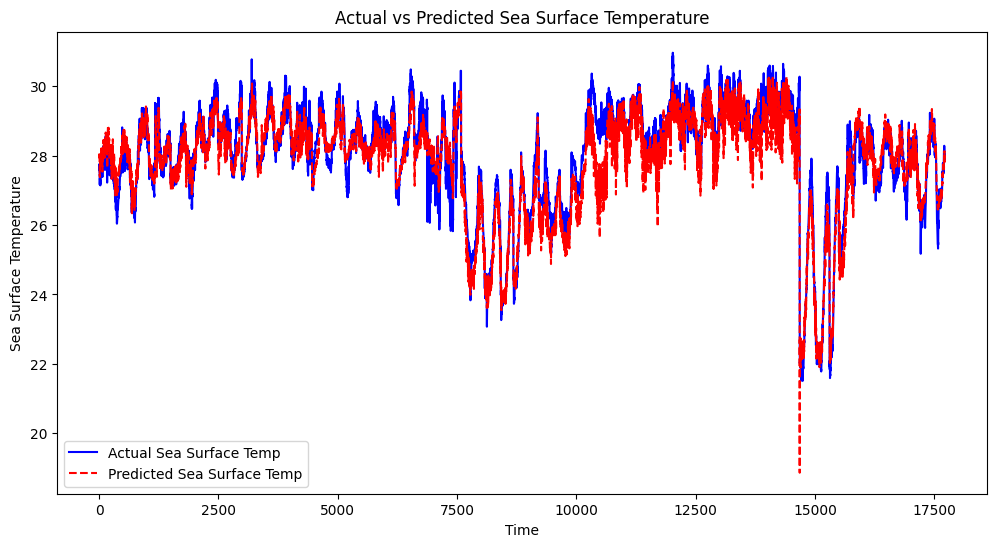

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Sea Surface Temp', color='blue')
plt.plot(final_predictions, label='Predicted Sea Surface Temp', color='red', linestyle='--')
plt.title('Actual vs Predicted Sea Surface Temperature')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature')
plt.legend()
plt.show()


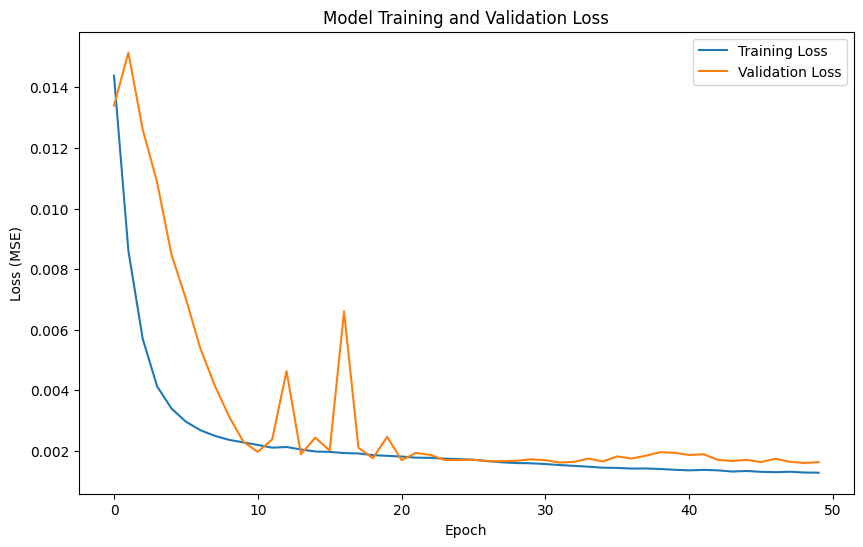

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


plt.figure(figsize=(8, 8))
plt.scatter(y_test_original, final_predictions, alpha=0.7)
plt.title('Actual vs Predicted Sea Surface Temperature')
plt.xlabel('Actual Sea Surface Temp')
plt.ylabel('Predicted Sea Surface Temp')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.show()


residuals = y_test_original - final_predictions

plt.figure(figsize=(8, 6))
plt.scatter(final_predictions, residuals, alpha=0.7)
plt.title('Residual Plot')
plt.xlabel('Predicted Sea Surface Temp')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


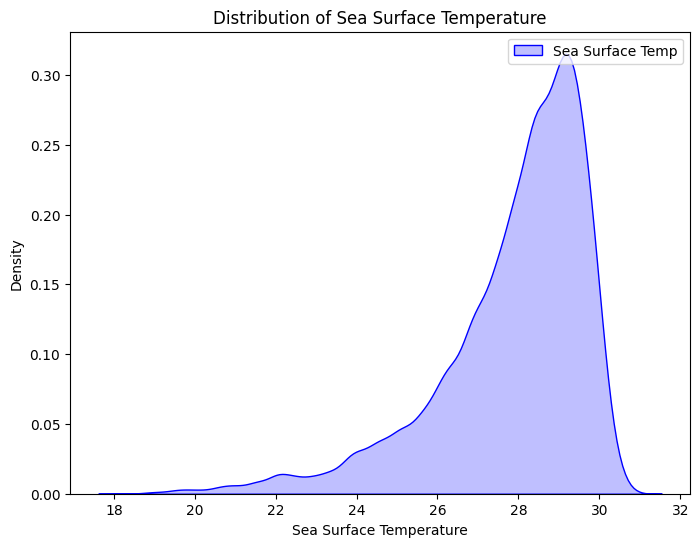

In [56]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Sea Surface Temp'], shade=True, color='blue', label='Sea Surface Temp')
plt.title('Distribution of Sea Surface Temperature')
plt.xlabel('Sea Surface Temperature')
plt.ylabel('Density')
plt.legend()
plt.show()


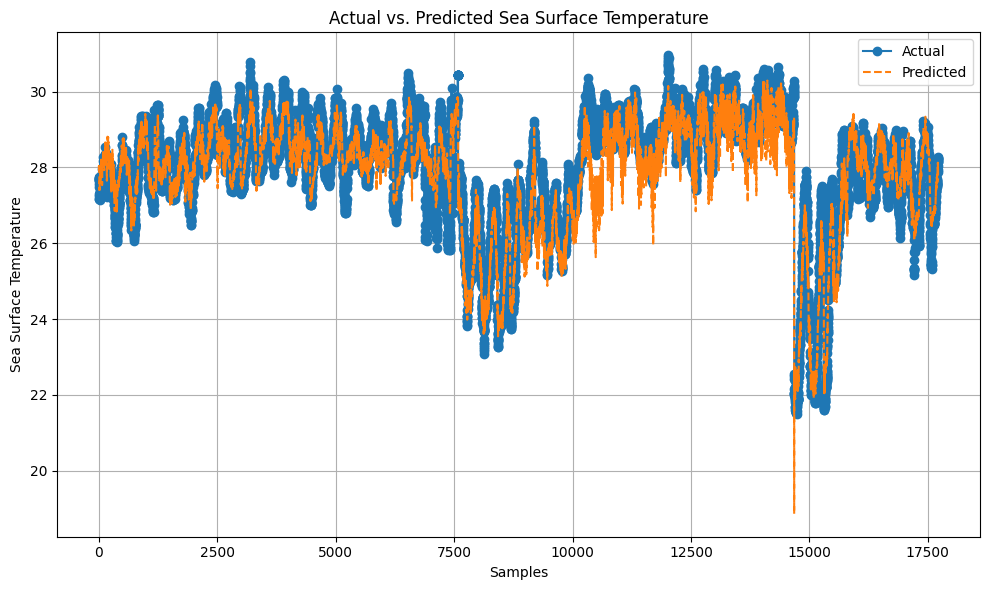

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual', marker='o')
plt.plot(final_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Sea Surface Temperature')
plt.xlabel('Samples')
plt.ylabel('Sea Surface Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


min_val = df['Sea Surface Temp'].min()
max_val = df['Sea Surface Temp'].max()

# Inverse transformation function
def inverse_transform(values, min_val, max_val):
    return values * (max_val - min_val) + min_val

# Convert scaled predictions and actual values back to actual temperature
actual_temp = inverse_transform(y_test_original, min_val, max_val)
predicted_temp = inverse_transform(final_predictions, min_val, max_val)

# Plotting actual and predicted temperatures separately
plt.figure(figsize=(12, 6))

# Actual Temperature Plot
plt.subplot(2, 1, 1)
plt.plot(actual_temp, label='Actual Sea Surface Temp', color='blue')
plt.title('Actual Sea Surface Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()